# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | armacao de buzios
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | isangel
Processing Record 6 of Set 1 | oltinko'l
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | kuta
Processing Record 11 of Set 1 | igrim
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | badger
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | fuyuan
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | baranchinskiy
Processing Record 22 of Set 1 | 

City not found. Skipping...
Processing Record 42 of Set 4 | mili
Processing Record 43 of Set 4 | yasnaya polyana
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | aktau
Processing Record 46 of Set 4 | saipan
Processing Record 47 of Set 4 | missoula
Processing Record 48 of Set 4 | castillos
Processing Record 49 of Set 4 | laguna
Processing Record 0 of Set 5 | sayat
Processing Record 1 of Set 5 | wickenburg
Processing Record 2 of Set 5 | miches
Processing Record 3 of Set 5 | samamea
City not found. Skipping...
Processing Record 4 of Set 5 | mitu
Processing Record 5 of Set 5 | kulia village
City not found. Skipping...
Processing Record 6 of Set 5 | hiratacho
Processing Record 7 of Set 5 | nar'yan-mar
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | bubaque
Processing Record 10 of Set 5 | utiel
Processing Record 11 of Set 5 | becerril
Processing Record 12 of Set 5 | korla
Processing Record 13 of Set 5 | yeed
Processing Record 14 of Set 5 | ant

Processing Record 33 of Set 8 | andratx
Processing Record 34 of Set 8 | nova sintra
Processing Record 35 of Set 8 | ballinasloe
Processing Record 36 of Set 8 | jalai nur
Processing Record 37 of Set 8 | hithadhoo
Processing Record 38 of Set 8 | gorgan
Processing Record 39 of Set 8 | knyaze-volkonskoye
Processing Record 40 of Set 8 | ascension
Processing Record 41 of Set 8 | kabansk
Processing Record 42 of Set 8 | villa gesell
Processing Record 43 of Set 8 | babu
Processing Record 44 of Set 8 | quellon
Processing Record 45 of Set 8 | kiunga
Processing Record 46 of Set 8 | aykol
City not found. Skipping...
Processing Record 47 of Set 8 | saudarkrokur
Processing Record 48 of Set 8 | hovd
Processing Record 49 of Set 8 | iron mountain
Processing Record 0 of Set 9 | rio grande
Processing Record 1 of Set 9 | kavieng
Processing Record 2 of Set 9 | east london
Processing Record 3 of Set 9 | kayangel
Processing Record 4 of Set 9 | broken hill
Processing Record 5 of Set 9 | alice springs
Processin

Processing Record 20 of Set 12 | uruzgan
Processing Record 21 of Set 12 | naze
Processing Record 22 of Set 12 | howard springs
Processing Record 23 of Set 12 | saint-pierre
Processing Record 24 of Set 12 | menongue
Processing Record 25 of Set 12 | ambodifotatra
Processing Record 26 of Set 12 | vohipaho
City not found. Skipping...
Processing Record 27 of Set 12 | tibanbang
Processing Record 28 of Set 12 | kalmunai
Processing Record 29 of Set 12 | kupang
Processing Record 30 of Set 12 | owen sound
Processing Record 31 of Set 12 | waslala
Processing Record 32 of Set 12 | smithers
Processing Record 33 of Set 12 | ribeira brava
Processing Record 34 of Set 12 | praya
Processing Record 35 of Set 12 | pante makasar
City not found. Skipping...
Processing Record 36 of Set 12 | bonny
Processing Record 37 of Set 12 | iskateley
Processing Record 38 of Set 12 | helena valley west central
Processing Record 39 of Set 12 | anar darah
Processing Record 40 of Set 12 | jieshi
Processing Record 41 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,armacao de buzios,-22.7469,-41.8817,302.18,82,0,9.62,BR,1701991552
1,kudahuvadhoo,2.6708,72.8944,300.16,82,99,7.94,MV,1701991614
2,albany,42.6001,-73.9662,271.45,88,92,0.32,US,1701991578
3,ribeira grande,38.5167,-28.7000,292.47,96,100,9.83,PT,1701991616
4,isangel,-19.5500,169.2667,302.21,58,75,3.60,VU,1701991367


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,armacao de buzios,-22.7469,-41.8817,302.18,82,0,9.62,BR,1701991552
1,kudahuvadhoo,2.6708,72.8944,300.16,82,99,7.94,MV,1701991614
2,albany,42.6001,-73.9662,271.45,88,92,0.32,US,1701991578
3,ribeira grande,38.5167,-28.7000,292.47,96,100,9.83,PT,1701991616
4,isangel,-19.5500,169.2667,302.21,58,75,3.60,VU,1701991367


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

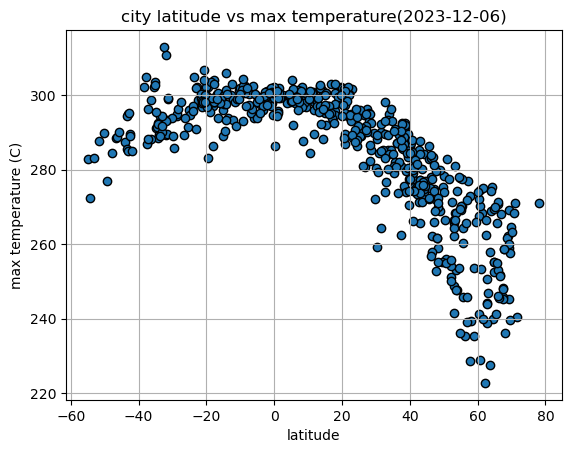

In [8]:
# Build scatter plot for latitude vs. temperature

lat_temp_plt = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("max temperature (C)")
plt.title("city latitude vs max temperature(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

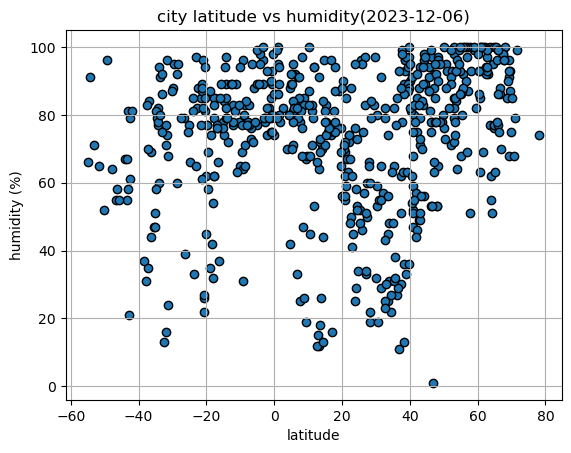

In [9]:
# Build scatter plot for latitude vs. humidity

lat_hum_plt = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("humidity (%)")
plt.title("city latitude vs humidity(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

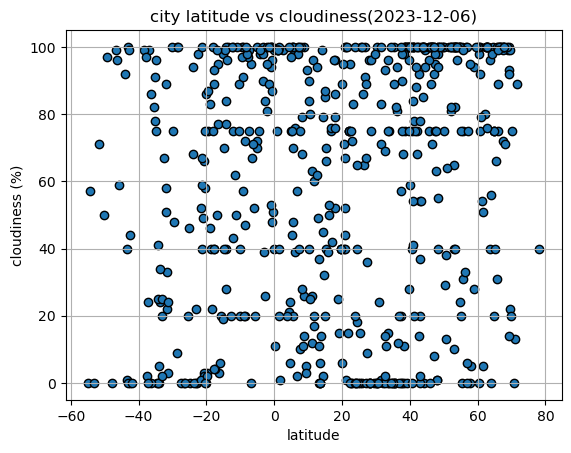

In [10]:
# Build scatter plot for latitude vs. cloudiness

lat_cloud_plt = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("cloudiness (%)")
plt.title("city latitude vs cloudiness(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

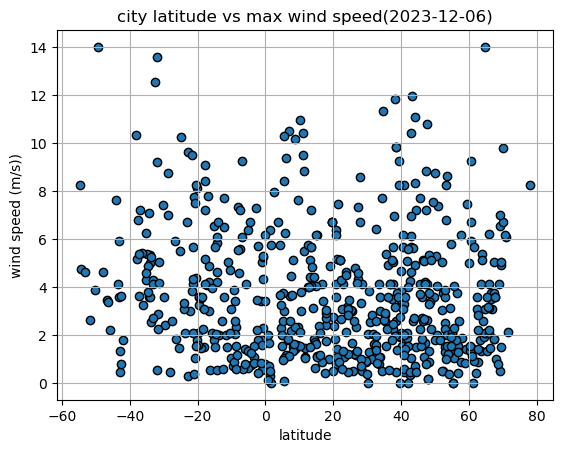

In [11]:
# Build scatter plot for latitude vs. wind

lat_wind_plt = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("wind speed (m/s))")
plt.title("city latitude vs max wind speed(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots

# =============== why isnt the line_eq showing up on all the graphs? =================

def lin_regress_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.8, 0.8), fontsize=15, color="red")
    print(f"the r-value is: {rvalue**2}")
    return


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kudahuvadhoo,2.6708,72.8944,300.16,82,99,7.94,MV,1701991614
2,albany,42.6001,-73.9662,271.45,88,92,0.32,US,1701991578
3,ribeira grande,38.5167,-28.7000,292.47,96,100,9.83,PT,1701991616
5,oltinko'l,40.8011,72.1634,281.29,47,100,0.44,UZ,1701991618
10,igrim,63.1906,64.4162,246.88,92,100,1.80,RU,1701991624


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,armacao de buzios,-22.7469,-41.8817,302.18,82,0,9.62,BR,1701991552
4,isangel,-19.5500,169.2667,302.21,58,75,3.60,VU,1701991367
6,west island,-12.1568,96.8225,299.14,83,100,7.72,CC,1701991619
7,adamstown,-25.0660,-130.1015,296.06,77,46,5.48,PN,1701991621
8,port-aux-francais,-49.3500,70.2167,277.00,96,97,13.99,TF,1701991622


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.719931668937074


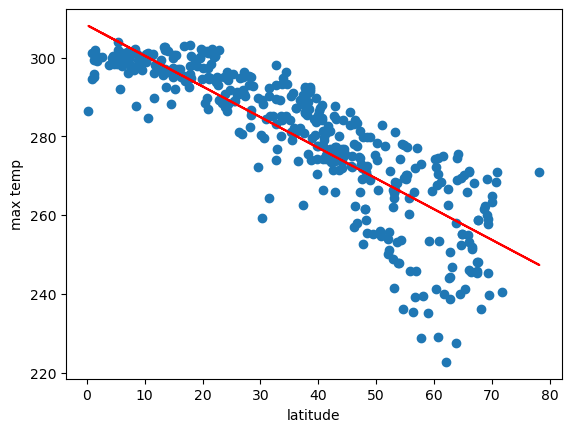

In [50]:
# Linear regression on Northern Hemisphere

lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("latitude")
plt.ylabel("max temp")
plt.show()

the r-value is: 0.33058244442378193


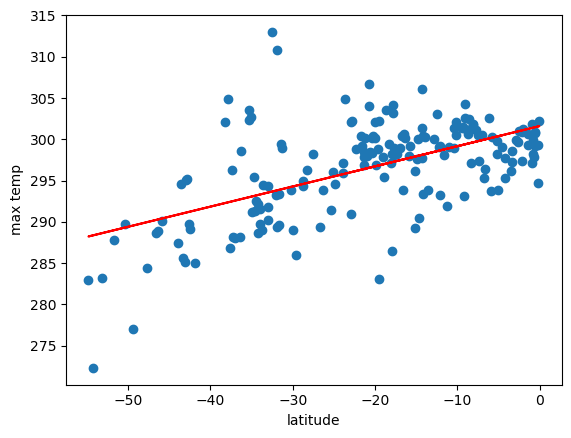

In [35]:
# Linear regression on Southern Hemisphere

lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("latitude")
plt.ylabel("max temp")
plt.show()

**Discussion about the linear relationship:** 
    The correlation between latitude in the northern hemisphere and maximum temperature is strongly correlated (r >= 0.7), and is weakly correlated (0.3 <= r < 5) in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.07327532069674485


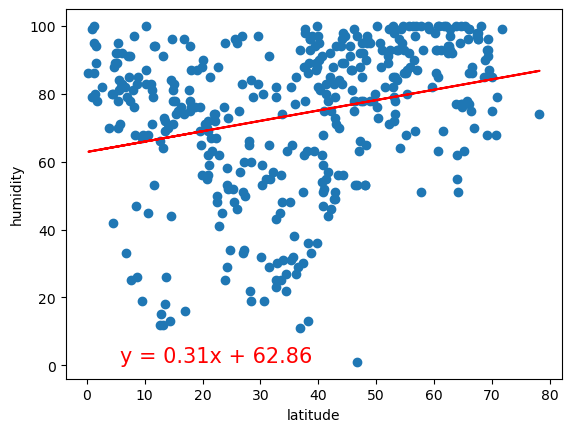

In [40]:
# Northern Hemisphere
lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

the r-value is: 0.10783329518282836


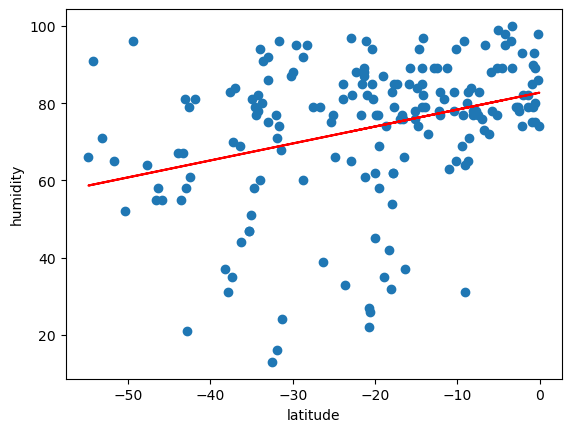

In [39]:
# Southern Hemisphere
lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.04878751462342201


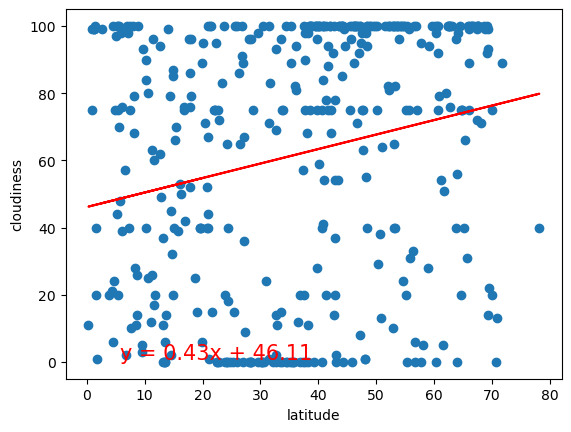

In [41]:
# Northern Hemisphere
lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

the r-value is: 0.09685648745331094


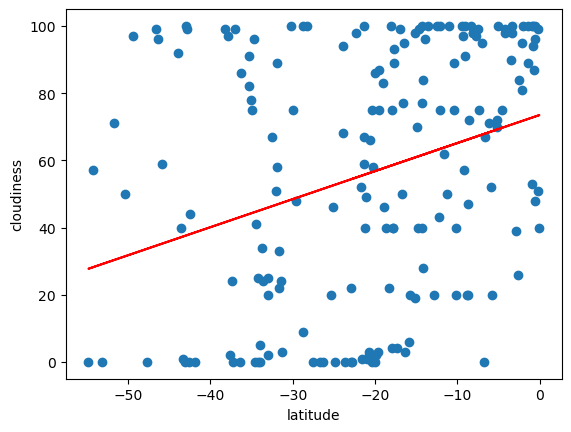

In [42]:
# Southern Hemisphere
lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 7.44993330807451e-06


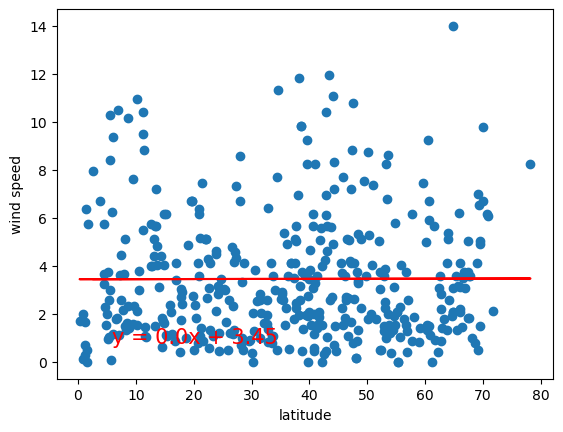

In [43]:
# Northern Hemisphere
lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.show()

the r-value is: 0.05826747887572903


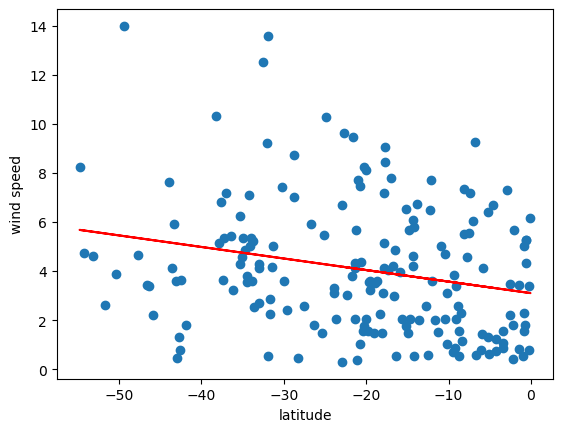

In [45]:
# Southern Hemisphere
lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE